# Proyek Analisis Data: Bike Sharing Dataset.
- Nama: Putri Oktavianti
- Email: oktaviantip52@gmail.com
- Id Dicoding: putri_oktavianti_12

## Menentukan Pertanyaan Bisnis

- Bagaimana tingkat penggunaan sepeda berkaitan dengan faktor-faktor musiman seperti musim, bulan, dan hari dalam seminggu?
- Apakah terdapat korelasi antara kondisi cuaca dan tingkat penggunaan sepeda?


## Menyaipkan semua library yang dibuthkan

import library digunakan untuk manipulasi dan analisis data, serta Matplotlib dan Seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid")

## Data Wrangling

### Gathering Data

In [3]:
day_data = pd.read_csv('dataset/day.csv')
hour_data = pd.read_csv('dataset/hour.csv')

In [4]:
print("Data harian:")
print(day_data.head())
print("\nData per jam:")
print(hour_data.head())

Data harian:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  

Data per jam

### Assessing Data

Memeriksa tipe data dari setiap kolom dalam dataset. Langkah ini membantu memahami format dan representasi data yang dimiliki, yang pada gilirannya dapat mempengaruhi pemilihan metode analisis yang tepat.

In [5]:
def check_data(df, name):
    print(f"\nInformasi dataset: {name}")
    print(df.info())
    print("\nJumlah nilai yang hilang:")
    print(df.isnull().sum())
    print(f"\nJumlah duplikasi: {df.duplicated().sum()}")
    print("\nStatistik deskriptif:")
    print(df.describe())

check_data(day_data, "Day Data")
check_data(hour_data, "Hour Data")


Informasi dataset: Day Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Jumlah nilai yang hilang:
instant       0
dteday        0


### Cleaning Data

Memperbaiki tipe data pada kolom kolom yang berisi tanggal ("dteday") dalam dua DataFrame, yaitu day_df dan hour_df, menjadi objek tipe data datetime menggunakan fungsi pd.to_datetime()

In [6]:
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

## Exploratory Data Analysis (EDA)

### Explore ...

Rangkuman parameter statistik yang diperoleh

In [7]:
print("\nDataset Day Data setelah pembersihan:")
print(day_data.head())
print("\nDataset Hour Data setelah pembersihan:")
print(hour_data.head())


Dataset Day Data setelah pembersihan:
   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  

In [8]:
print("\nStatistik deskriptif Day Data:")
print(day_data.describe(include='all'))
print("\nStatistik deskriptif Hour Data:")
print(hour_data.describe(include='all'))


Statistik deskriptif Day Data:
          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.000000    0

In [9]:
seasonal_trend = day_data.groupby('season')['cnt'].mean().reset_index()
print("\nRata-rata penggunaan sepeda berdasarkan musim:")
print(seasonal_trend)


Rata-rata penggunaan sepeda berdasarkan musim:
   season          cnt
0       1  2604.132597
1       2  4992.331522
2       3  5644.303191
3       4  4728.162921


In [10]:
weather_trend = day_data.groupby('weathersit')['cnt'].mean().reset_index()
print("\nHubungan kondisi cuaca dengan penggunaan sepeda:")
print(weather_trend)


Hubungan kondisi cuaca dengan penggunaan sepeda:
   weathersit          cnt
0           1  4876.786177
1           2  4035.862348
2           3  1803.285714


## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana tingkat penggunaan sepeda berkaitan dengan faktor-faktor musiman seperti musim, bulan, dan hari dalam seminggu?

<ipython-input-11-e8cbc91cebec>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='season', y='cnt', data=day_data, estimator=np.mean, ci=None, palette='coolwarm')
<ipython-input-11-e8cbc91cebec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=day_data, estimator=np.mean, ci=None, palette='coolwarm')


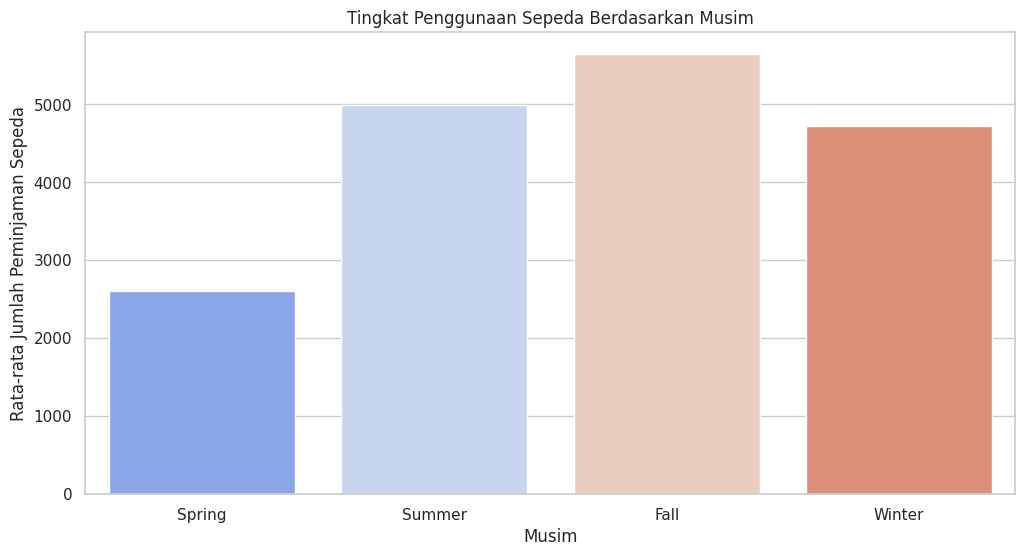

<ipython-input-11-e8cbc91cebec>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weekday', y='cnt', data=day_data, estimator=np.mean, ci=None, palette='coolwarm')
<ipython-input-11-e8cbc91cebec>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday', y='cnt', data=day_data, estimator=np.mean, ci=None, palette='coolwarm')


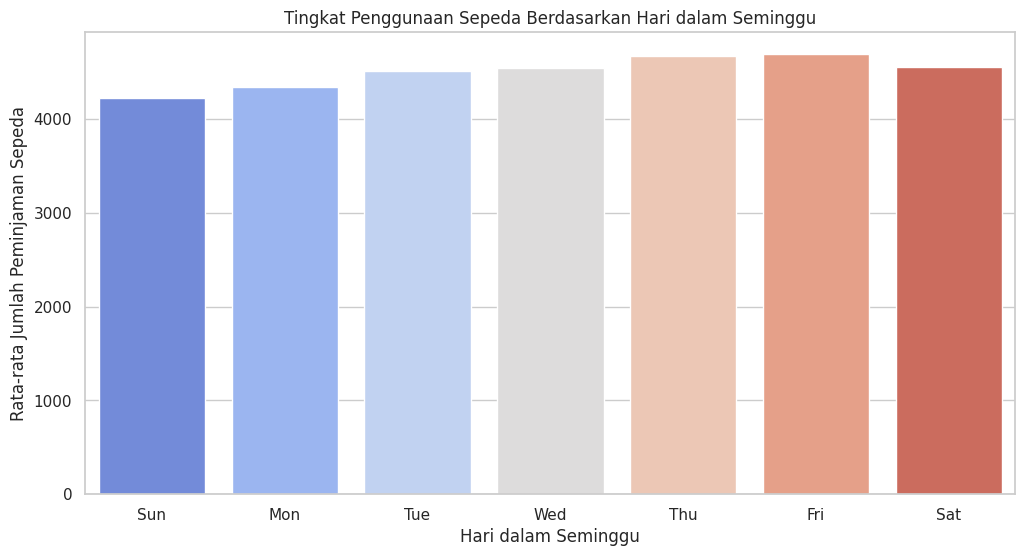

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='cnt', data=day_data, estimator=np.mean, ci=None, palette='coolwarm')
plt.title('Tingkat Penggunaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Peminjaman Sepeda')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()


plt.figure(figsize=(12, 6))
sns.barplot(x='weekday', y='cnt', data=day_data, estimator=np.mean, ci=None, palette='coolwarm')
plt.title('Tingkat Penggunaan Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Rata-rata Jumlah Peminjaman Sepeda')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.show()

### Pertanyaan 2:

Apakah terdapat korelasi antara kondisi cuaca dan tingkat penggunaan sepeda?

<ipython-input-12-868fac8611ce>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=day_data, estimator=np.mean, ci=None, palette='coolwarm')
<ipython-input-12-868fac8611ce>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=day_data, estimator=np.mean, ci=None, palette='coolwarm')


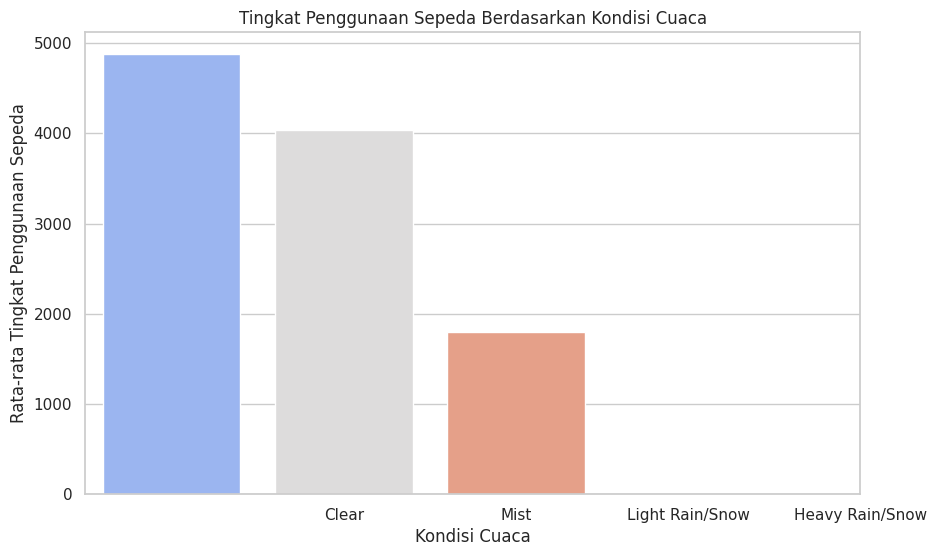

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=day_data, estimator=np.mean, ci=None, palette='coolwarm')
plt.title('Tingkat Penggunaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Tingkat Penggunaan Sepeda')
plt.xticks(ticks=[1, 2, 3, 4], labels=['Clear', 'Mist', 'Light Rain/Snow', 'Heavy Rain/Snow'])
plt.show()

In [13]:
day_data.to_csv("cleaned_day.csv", index=False)
hour_data.to_csv("cleaned_hour.csv", index=False)

## Conclusion

- Bagaimana tingkat penggunaan sepeda berkaitan dengan faktor-faktor musiman seperti musim, bulan, dan hari dalam seminggu?

   1. Penggunaan sepeda berfluktuasi sepanjang tahun, dengan peningkatan signifikan pada musim panas (Mei - September).
   2. Hari dalam seminggu juga mempengaruhi penggunaan sepeda, dengan jumlah peminjaman lebih tinggi pada akhir pekan.

- Apakah terdapat korelasi antara kondisi cuaca dan tingkat penggunaan sepeda?

1. Penggunaan sepeda lebih tinggi pada cuaca yang lebih baik (weathersit rendah).
2. Cuaca yang kurang menguntungkan (weathersit tinggi) menyebabkan penurunan signifikan dalam peminjaman sepeda.